<a href="https://colab.research.google.com/github/srujayreddyv/CSUS-CSC177-DataAnalyticsAndMining/blob/main/labs/Tutorial6_Classification_Srujay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 6: Classification

The following tutorial contains Python examples for solving classification problems. You should refer to the Chapters 3 and 4 of the "Introduction to Data Mining" book to understand some of the concepts introduced in this tutorial.

Classification is the task of predicting a nominal-valued attribute (known as class label) based on the values of other attributes (known as predictor variables). The goals for this tutorial are as follows:
1. To provide examples of using different classification techniques from the scikit-learn library package.
2. To demonstrate the problem of model overfitting.

Read the step-by-step instructions below carefully. To execute the code, click on the corresponding cell and press the SHIFT-ENTER keys simultaneously.


## What if the data is not categorical, i.e. if the data is continous numerical value? Can we use tree for the same?

Answer is Yes.

We can use the Decision Tree Regressor Model to work on the continous numerical value.

Here is the link for the DecisionTreeRegressor Model.

DecisionTreeRegressor: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

### Decision Tree Regressor

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = np.array(
[['Asset Flip', 100, 1000],
['Text Based', 500, 3000],
['Visual Novel', 1500, 5000],
['2D Pixel Art', 3500, 8000],
['2D Vector Art', 5000, 6500],
['Strategy', 6000, 7000],
['First Person Shooter', 8000, 15000],
['Simulator', 9500, 20000],
['Racing', 12000, 21000],
['RPG', 14000, 25000],
['Sandbox', 15500, 27000],
['Open-World', 16500, 30000],
['MMOFPS', 25000, 52000],
['MMORPG', 30000, 80000]
])


In [3]:
# select all rows by : and column 1
# by 1:2 representing features
X = dataset[:, 1:2].astype(int)
y = dataset[:, 2].astype(int)



In [4]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X, y)


DecisionTreeRegressor(random_state=0)

In [5]:
y_pred = regressor.predict([[3750]])
print("Predicted price: % d\n"% y_pred)


Predicted price:  8000



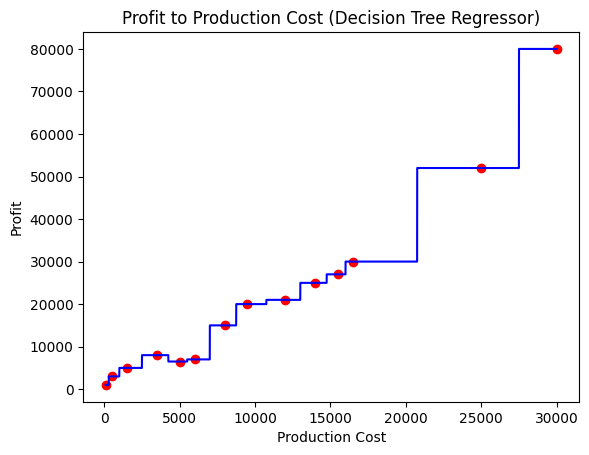

In [6]:
# arange for creating a range of values
# from min value of X to max value of X
# with a difference of 0.01 between two
# consecutive values
X_grid = np.arange(min(X), max(X), 0.01)

# reshape for reshaping the data into
# a len(X_grid)*1 array, i.e. to make
# a column out of the X_grid values

X_grid = X_grid.reshape((len(X_grid), 1))

plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Profit to Production Cost (Decision Tree Regressor)')
plt.xlabel('Production Cost')
plt.ylabel('Profit')
plt.show()


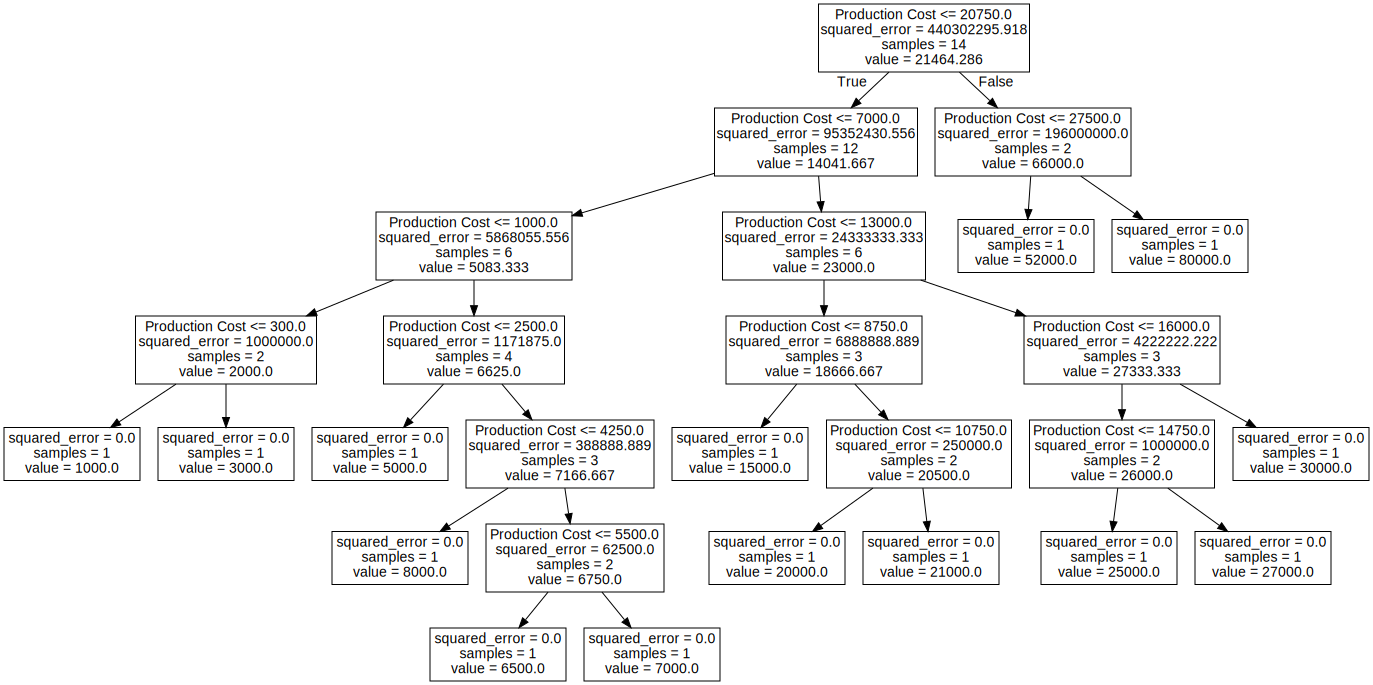

In [7]:
from sklearn import tree
import graphviz

dot_data = tree.export_graphviz(regressor, out_file =None,feature_names =['Production Cost'])

graph = graphviz.Source(dot_data)
graph

##  For Decsision Tree Classifier

In [8]:
import sklearn
import matplotlib.pyplot as plt
import numpy as np

In [9]:
# Plot a confusion matrix.
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Vertebrate Dataset

We use a variation of the vertebrate data described in Example 3.1 of Chapter 3. Each vertebrate is classified into one of 5 categories: mammals, reptiles, birds, fishes, and amphibians, based on a set of explanatory attributes (predictor variables). Except for "name", the rest of the attributes have been converted into a *one hot encoding* binary representation. To illustrate this, we will first load the data into a Pandas DataFrame object and display its content.

In [10]:
from google.colab import files
uploaded = files.upload()

Saving vertebrate.csv to vertebrate.csv


In [12]:
import pandas as pd
import seaborn as sns

data = pd.read_csv('vertebrate.csv',header='infer')
data

,Name,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,human,1,1,0,0,1,0,mammals
1,python,0,0,0,0,0,1,reptiles
2,salmon,0,0,1,0,0,0,fishes
3,whale,1,1,1,0,0,0,mammals
4,frog,0,0,1,0,1,1,amphibians
5,komodo,0,0,0,0,1,0,reptiles
6,bat,1,1,0,1,1,1,mammals
7,pigeon,1,0,0,1,1,0,birds
8,cat,1,1,0,0,1,0,mammals
9,leopard shark,0,1,1,0,0,0,fishes


Given the limited number of training examples, suppose we convert the problem into a binary classification task (mammals versus non-mammals). We can do so by replacing the class labels of the instances to *non-mammals* except for those that belong to the *mammals* class.

In [13]:
data['Class'] = data['Class'].replace(['fishes','birds','amphibians','reptiles'],'non-mammals')
data

,Name,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,human,1,1,0,0,1,0,mammals
1,python,0,0,0,0,0,1,non-mammals
2,salmon,0,0,1,0,0,0,non-mammals
3,whale,1,1,1,0,0,0,mammals
4,frog,0,0,1,0,1,1,non-mammals
5,komodo,0,0,0,0,1,0,non-mammals
6,bat,1,1,0,1,1,1,mammals
7,pigeon,1,0,0,1,1,0,non-mammals
8,cat,1,1,0,0,1,0,mammals
9,leopard shark,0,1,1,0,0,0,non-mammals


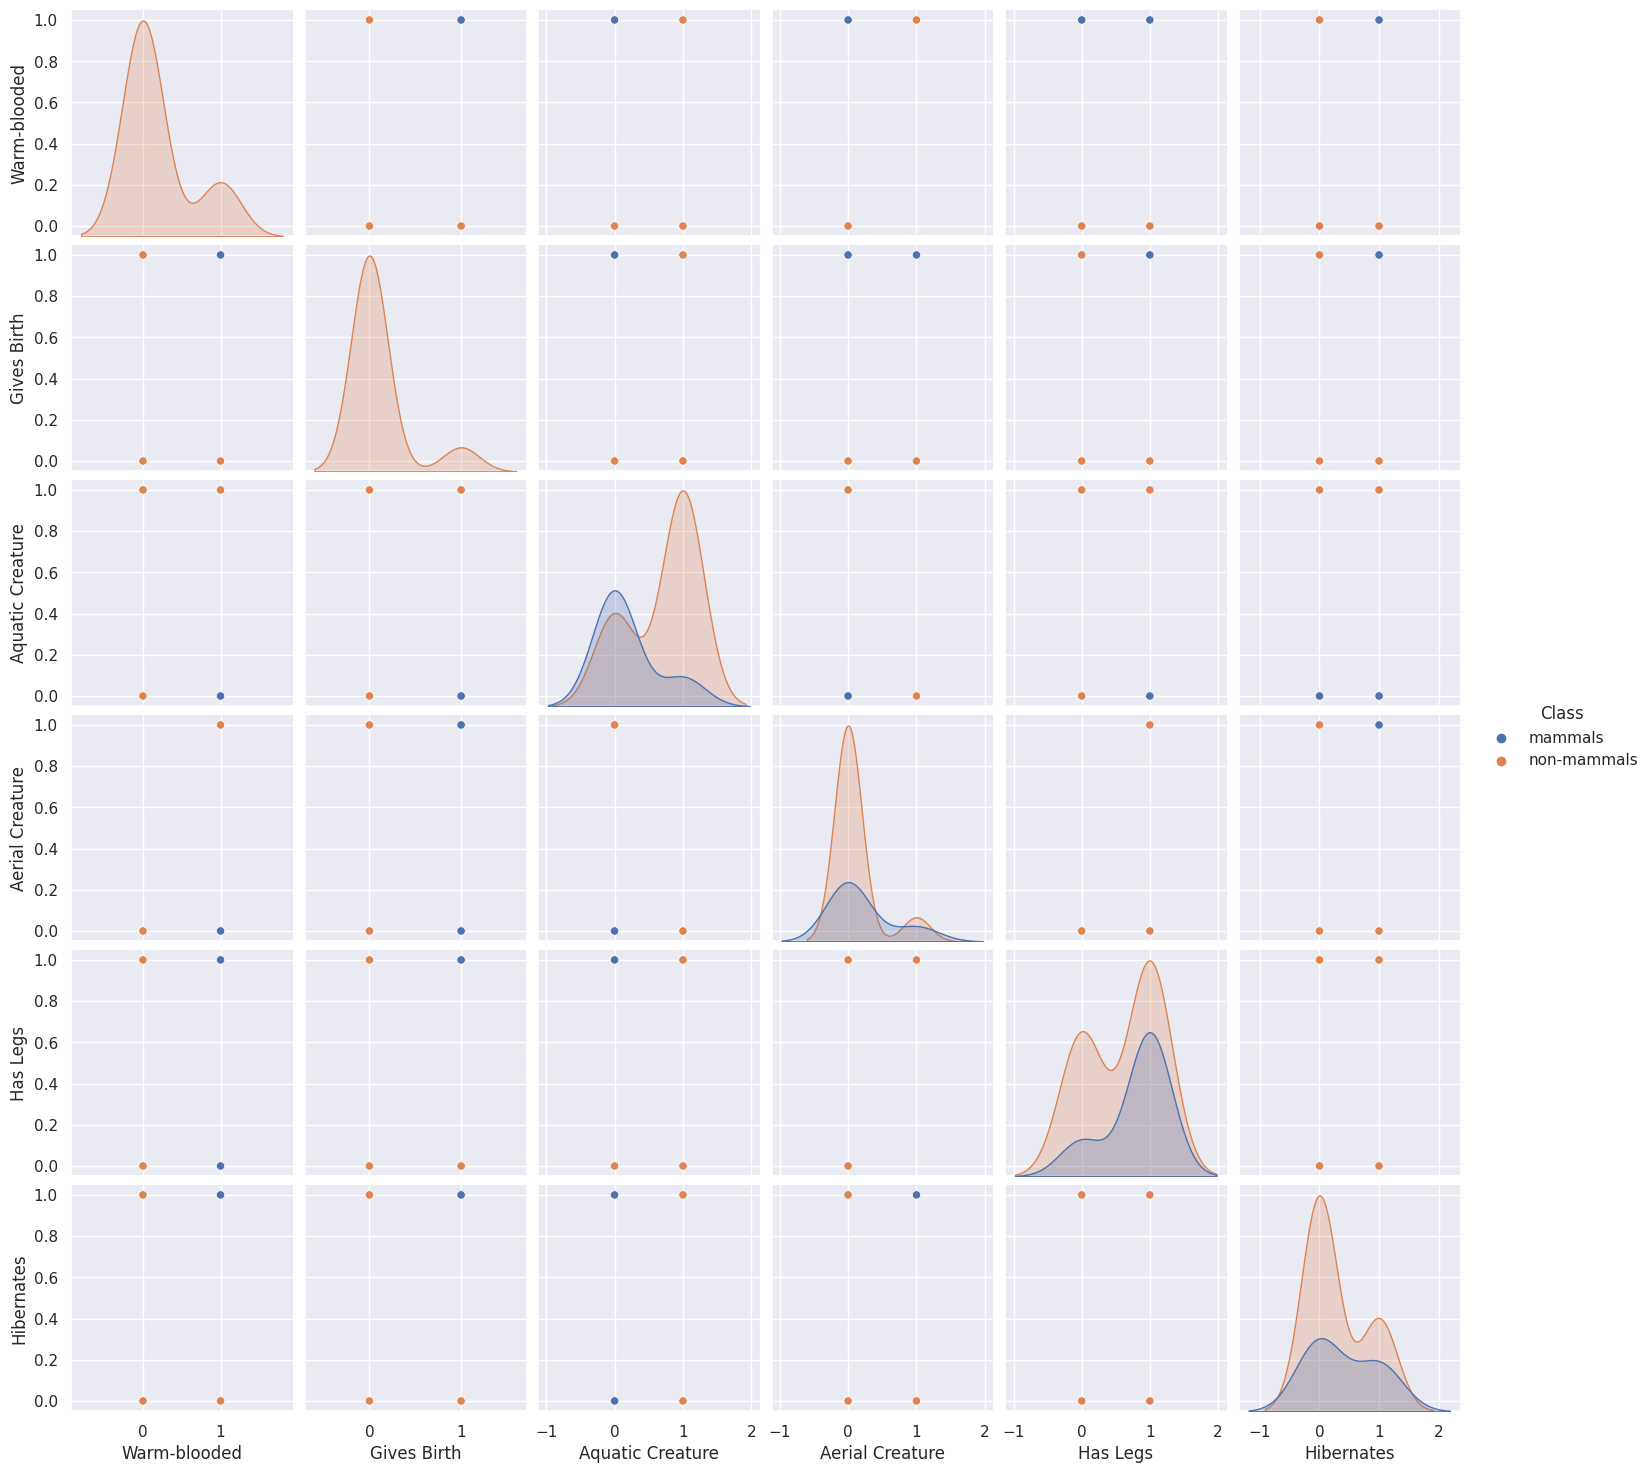

In [14]:
# Paired plot using seaborn
sns.set()
sns.pairplot(data[['Warm-blooded', 'Gives Birth', 'Aquatic Creature', 'Aerial Creature', 'Has Legs','Hibernates','Class']],
             hue='Class', diag_kind="kde")

We can apply Pandas cross-tabulation to examine the relationship between the Warm-blooded and Gives Birth attributes with respect to the class.

In [15]:
pd.crosstab([data['Warm-blooded'],data['Gives Birth']],data['Class'])

Class                     mammals  non-mammals
Warm-blooded Gives Birth                      
0            0                  0            7
             1                  0            1
1            0                  0            2
             1                  5            0

The results above show that it is possible to distinguish mammals from non-mammals using these two attributes alone since each combination of their attribute values would yield only instances that belong to the same class. For example, mammals can be identified as warm-blooded vertebrates that give birth to their young. Such a relationship can also be derived using a decision tree classifier, as shown by the example given in the next subsection.

## Decision Tree Classifier

In this section, we apply a decision tree classifier to the vertebrate dataset described in the previous subsection.

In [16]:
from sklearn import tree

Y = pd.DataFrame(data, columns=['Class'])
X = data.drop(['Name','Class'],axis=1)

clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)
clf = clf.fit(X, Y)

In [17]:
X

,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates
0,1,1,0,0,1,0
1,0,0,0,0,0,1
2,0,0,1,0,0,0
3,1,1,1,0,0,0
4,0,0,1,0,1,1
5,0,0,0,0,1,0
6,1,1,0,1,1,1
7,1,0,0,1,1,0
8,1,1,0,0,1,0
9,0,1,1,0,0,0


The preceding commands will extract the predictor (X) and target class (Y) attributes from the vertebrate dataset and create a decision tree classifier object using entropy as its impurity measure for splitting criterion. The decision tree class in Python sklearn library also supports using 'gini' as impurity measure. The classifier above is also constrained to generate trees with a maximum depth equals to 3. Next, the classifier is trained on the labeled data using the fit() function.

We can plot the resulting decision tree obtained after training the classifier. To do this, you must first install both graphviz (http://www.graphviz.org) and its Python interface called pydotplus (http://pydotplus.readthedocs.io/).

In [18]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)

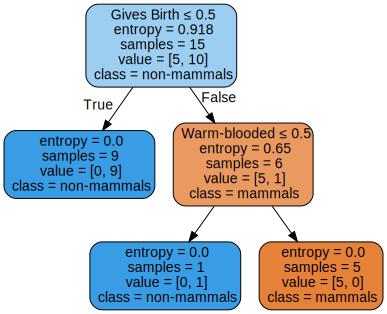

In [19]:
dot_data = tree.export_graphviz(clf, out_file=None,
                      feature_names=X.columns,
                      class_names=['mammals','non-mammals'],
                      filled=True, rounded=True,
                      special_characters=True)
graph = graphviz.Source(dot_data)
graph

Next, suppose we apply the decision tree to classify the following test examples.

In [20]:
testData = [['gila monster',0,0,0,0,1,1,'non-mammals'],
           ['platypus',1,0,0,0,1,1,'mammals'],
           ['owl',1,0,0,1,1,0,'non-mammals'],
           ['dolphin',1,1,1,0,0,0,'mammals']]
testData = pd.DataFrame(testData, columns=data.columns)
testData

,Name,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,gila monster,0,0,0,0,1,1,non-mammals
1,platypus,1,0,0,0,1,1,mammals
2,owl,1,0,0,1,1,0,non-mammals
3,dolphin,1,1,1,0,0,0,mammals


We first extract the predictor and target class attributes from the test data and then apply the decision tree classifier to predict their classes.

In [21]:
testY = pd.DataFrame(testData, columns=['Class'])
testX = testData.drop(['Name','Class'],axis=1)

predY = clf.predict(testX)
predictions = pd.concat([testData['Name'],pd.Series(predY,name='Predicted Class')], axis=1)
predictions





,Name,Predicted Class
0,gila monster,non-mammals
1,platypus,non-mammals
2,owl,non-mammals
3,dolphin,mammals


Except for platypus, which is an egg-laying mammal, the classifier correctly predicts the class label of the test examples. We can calculate the accuracy of the classifier on the test data as shown by the example given below.

[[1 1]
 [0 2]]
Accuracy on test data is 0.75
F1 score on test data is 0.67
Precision Score on test data is 1.00
Recall score on test data is 0.50
              precision    recall  f1-score   support

     mammals       1.00      0.50      0.67         2
 non-mammals       0.67      1.00      0.80         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



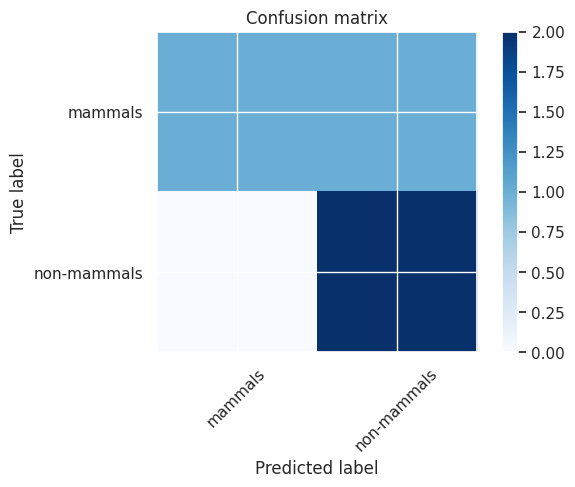

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score,recall_score,classification_report

confusion = confusion_matrix(testY, predY)
print(confusion)

plot_confusion_matrix(confusion, data.Class.unique(), title='Confusion matrix', cmap=plt.cm.Blues)

print('Accuracy on test data is %.2f' % (accuracy_score(testY, predY)))
print('F1 score on test data is %.2f' % (f1_score(testY, predY,pos_label='mammals')))
print('Precision Score on test data is %.2f' % (precision_score(testY, predY,pos_label='mammals')))
print('Recall score on test data is %.2f' % (recall_score(testY, predY,pos_label='mammals')))
print( classification_report(testY,predY))


In [23]:

list(data.Class.unique())


['mammals', 'non-mammals']

## Logistic Regression

In this section, we apply a Logistic Regression to the vertebrate dataset described in the previous subsection.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

['non-mammals' 'non-mammals' 'non-mammals' 'non-mammals']
['non-mammals' 'non-mammals' 'non-mammals' 'non-mammals']
['non-mammals' 'non-mammals' 'non-mammals' 'non-mammals']
['non-mammals' 'non-mammals' 'non-mammals' 'non-mammals']
['non-mammals' 'non-mammals' 'non-mammals' 'mammals']
['non-mammals' 'non-mammals' 'non-mammals' 'mammals']
['non-mammals' 'non-mammals' 'non-mammals' 'mammals']
['non-mammals' 'non-mammals' 'non-mammals' 'mammals']
['non-mammals' 'non-mammals' 'non-mammals' 'mammals']
['non-mammals' 'non-mammals' 'non-mammals' 'mammals']


Text(0, 0.5, 'Accuracy')

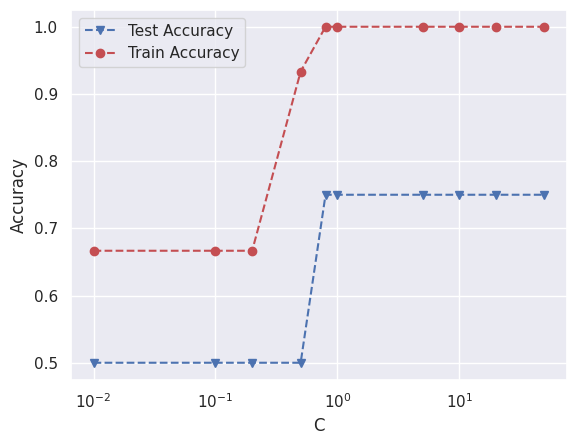

In [24]:
from sklearn.linear_model import LogisticRegression


C = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50]

LRtestAcc = []
LRtrainAcc = []

for param in C:
    clf = LogisticRegression(C=param)
    clf.fit(X,Y)
    log_reg_pred = clf.predict(testX)
    log_reg_pred_train = clf.predict(X)
    print(log_reg_pred)
    LRtestAcc.append(accuracy_score(testY, log_reg_pred))
    LRtrainAcc.append(accuracy_score(Y,log_reg_pred_train))



plt.plot(C, LRtestAcc,'bv--',C,LRtrainAcc,'ro--')
plt.legend(['Test Accuracy','Train Accuracy'])
plt.xlabel('C')
plt.xscale('log')
plt.ylabel('Accuracy')

## Naive Bayes Classifier

In this section, we apply a Naise Bayes classifier to the vertebrate dataset described in the previous subsection.

In [25]:
from sklearn.naive_bayes import GaussianNB

clf_NB = GaussianNB()
clf_NB.fit(X,Y)
NB_pred = clf_NB.predict(testX)
print(NB_pred)

print('Accuracy on test data is %.2f' % (accuracy_score(testY, NB_pred)))

['non-mammals' 'non-mammals' 'non-mammals' 'mammals']
Accuracy on test data is 0.75


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Support Vector Machine (SVM) Classifier

In this section, we apply a SVM classifier to the vertebrate dataset described in the previous subsection. We will also experiment with C-parameter and different kernals and see how it effects the performance of the model.

### Linear Decision Boundary

['non-mammals' 'non-mammals' 'non-mammals' 'non-mammals']
['non-mammals' 'non-mammals' 'non-mammals' 'non-mammals']
['non-mammals' 'non-mammals' 'non-mammals' 'non-mammals']
['non-mammals' 'non-mammals' 'non-mammals' 'mammals']
['non-mammals' 'non-mammals' 'non-mammals' 'mammals']
['non-mammals' 'non-mammals' 'non-mammals' 'mammals']
['non-mammals' 'non-mammals' 'non-mammals' 'mammals']
['non-mammals' 'non-mammals' 'non-mammals' 'mammals']
['non-mammals' 'non-mammals' 'non-mammals' 'mammals']
['non-mammals' 'non-mammals' 'non-mammals' 'mammals']


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Text(0, 0.5, 'Accuracy')

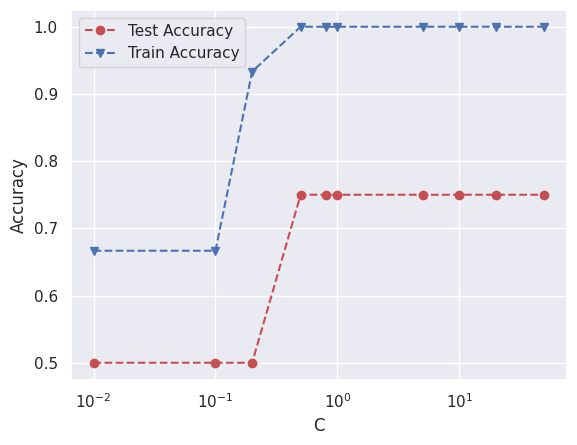

In [26]:
from sklearn.svm import SVC

C = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50]

SVMLtestAcc = []
SVMLtrainAcc = []



for param in C:
    clf = SVC(C=param,kernel='linear')
    clf.fit(X,Y)
    svml_pred = clf.predict(testX)
    svml_pred_train = clf.predict(X)
    print(svml_pred)
    SVMLtestAcc.append(accuracy_score(testY, svml_pred))
    SVMLtrainAcc.append(accuracy_score(Y,svml_pred_train))

plt.plot(C, SVMLtestAcc,'ro--', C,SVMLtrainAcc,'bv--')
plt.legend(['Test Accuracy','Train Accuracy'])
plt.xlabel('C')
plt.xscale('log')
plt.ylabel('Accuracy')

### Non Linear Decision Boundary

['non-mammals' 'non-mammals' 'non-mammals' 'non-mammals']
['non-mammals' 'non-mammals' 'non-mammals' 'non-mammals']
['non-mammals' 'non-mammals' 'non-mammals' 'non-mammals']
['non-mammals' 'non-mammals' 'non-mammals' 'non-mammals']
['non-mammals' 'non-mammals' 'non-mammals' 'non-mammals']
['non-mammals' 'non-mammals' 'non-mammals' 'mammals']
['non-mammals' 'non-mammals' 'non-mammals' 'mammals']
['non-mammals' 'non-mammals' 'non-mammals' 'mammals']
['non-mammals' 'non-mammals' 'non-mammals' 'mammals']
['non-mammals' 'non-mammals' 'non-mammals' 'mammals']


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Text(0, 0.5, 'Accuracy')

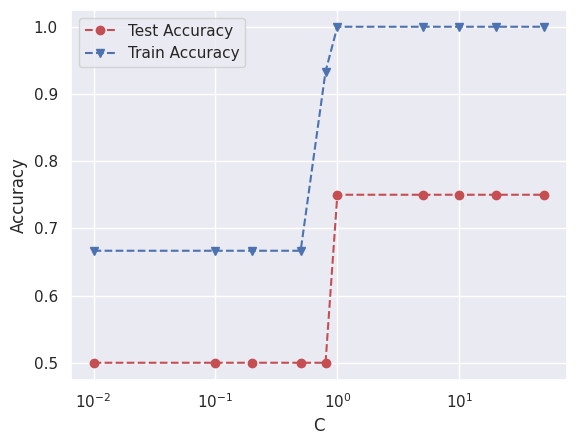

In [27]:
C = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50]


SVMLtestAcc = []
SVMLtrainAcc = []



for param in C:
    clf = SVC(C=param,kernel='rbf',gamma='auto')
    clf.fit(X,Y)
    svml_pred = clf.predict(testX)
    svml_pred_train = clf.predict(X)
    print(svml_pred)
    SVMLtestAcc.append(accuracy_score(testY, svml_pred))
    SVMLtrainAcc.append(accuracy_score(Y,svml_pred_train))

plt.plot(C, SVMLtestAcc,'ro--', C,SVMLtrainAcc,'bv--')
plt.legend(['Test Accuracy','Train Accuracy'])
plt.xlabel('C')
plt.xscale('log')
plt.ylabel('Accuracy')

## K Nearest Neighbor (KNN) Classifier

In this section, we apply a K - Nearest Neighbor classifier to the vertebrate dataset described in the previous subsection. We will also look at how the K value effect the performance of the Model.

['non-mammals' 'mammals' 'non-mammals' 'mammals']
['non-mammals' 'non-mammals' 'mammals' 'mammals']
['non-mammals' 'non-mammals' 'non-mammals' 'non-mammals']


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Text(0, 0.5, 'Accuracy')

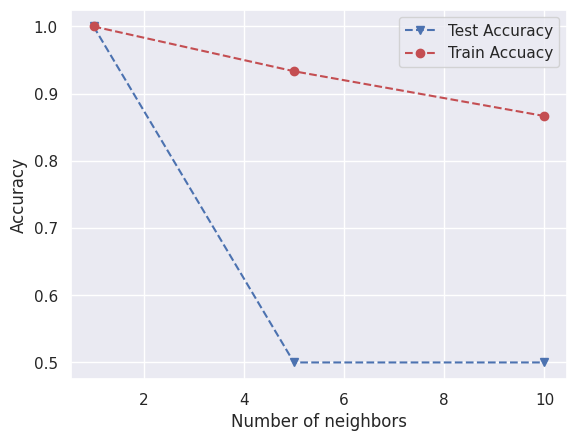

In [28]:
from sklearn.neighbors import KNeighborsClassifier

numNeighbors = [1, 5, 10]
testAcc = []
trainAcc = []

for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf.fit(X, Y)
    knn_pred = clf.predict(testX)
    knn_pred_train = clf.predict(X)
    print(knn_pred)
    testAcc.append(accuracy_score(testY, knn_pred))
    trainAcc.append(accuracy_score(Y,knn_pred_train))

plt.plot(numNeighbors, testAcc,'bv--',numNeighbors, trainAcc, 'ro--')
plt.legend(['Test Accuracy','Train Accuacy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')

## Artificial Neural Network

In [29]:
from keras import Sequential
from keras.layers import Dense
import numpy as np
from sklearn import preprocessing

In [30]:
# Encode text values to dummy variables(i.e. [1,0,0],[0,1,0],[0,0,1] for red,green,blue)
def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = "{}-{}".format(name, x)
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)

# Encode text values to indexes(i.e. [1],[2],[3] for red,green,blue).
def encode_text_index(df, name):
    le = preprocessing.LabelEncoder()
    df[name] = le.fit_transform(df[name])
    return le.classes_

# Convert a Pandas dataframe to the x,y inputs that TensorFlow needs
import collections
def to_xy(df, target):
    result = []
    for x in df.columns:
        if x != target:
            result.append(x)
    # find out the type of the target column.
    target_type = df[target].dtypes
    target_type = target_type[0] if isinstance(target_type, collections.Sequence) else target_type
    # Encode to int for classification, float otherwise. TensorFlow likes 32 bits.
    if target_type in (np.int64, np.int32):
        # Classification
        dummies = pd.get_dummies(df[target])
        return df[result].values.astype(np.float32), dummies.values.astype(np.float32)
    else:
        # Regression
        return df[result].values.astype(np.float32), df[target].values.astype(np.float32)

In [32]:
data_df = pd.read_csv('vertebrate.csv',header='infer')

In [33]:
data_df = data_df.drop('Name', axis=1)
data_df['Class'] = data_df['Class'].replace(['fishes','birds','amphibians','reptiles'],'non-mammals')
Classes = encode_text_index(data_df,'Class')


In [ ]:
data_df

,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,1,1,0,0,1,0,0
1,0,0,0,0,0,1,1
2,0,0,1,0,0,0,1
3,1,1,1,0,0,0,0
4,0,0,1,0,1,1,1
5,0,0,0,0,1,0,1
6,1,1,0,1,1,1,0
7,1,0,0,1,1,0,1
8,1,1,0,0,1,0,0
9,0,1,1,0,0,0,1


In [34]:
testData = [['gila monster',0,0,0,0,1,1,'non-mammals'],
           ['platypus',1,0,0,0,1,1,'mammals'],
           ['owl',1,0,0,1,1,0,'non-mammals'],
           ['dolphin',1,1,1,0,0,0,'mammals']]
testData = pd.DataFrame(testData, columns=data.columns)
testData

,Name,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,gila monster,0,0,0,0,1,1,non-mammals
1,platypus,1,0,0,0,1,1,mammals
2,owl,1,0,0,1,1,0,non-mammals
3,dolphin,1,1,1,0,0,0,mammals


In [35]:
testData = testData.drop('Name', axis=1)
encode_text_index(testData,'Class')

array(['mammals', 'non-mammals'], dtype=object)

In [36]:
testData

,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,0,0,0,0,1,1,1
1,1,0,0,0,1,1,0
2,1,0,0,1,1,0,1
3,1,1,1,0,0,0,0


In [37]:
Classes

array(['mammals', 'non-mammals'], dtype=object)

In [40]:
X,Y = to_xy(data_df,'Class')
testX, testY = to_xy(testData,'Class')

AttributeError: ignored

In [41]:
print(X.shape)
print(Y.shape)
Y

(15, 6)
(15, 1)


,Class
0,mammals
1,non-mammals
2,non-mammals
3,mammals
4,non-mammals
5,non-mammals
6,mammals
7,non-mammals
8,mammals
9,non-mammals


In [42]:
model = Sequential()
model.add(Dense(12, input_dim = X.shape[1], activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam')
model.fit(X,Y,verbose=2, epochs=100)

Epoch 1/100


ValueError: ignored

In [43]:
pred = model.predict(testX)
print(pred[0])

1/1 [==============================] - 0s 182ms/step
[0.51058894 0.489411  ]


In [44]:
pred = np.argmax(pred, axis=1)

In [45]:
true = np.argmax(testY, axis=1)

In [46]:
Classes[pred]

array(['mammals', 'mammals', 'non-mammals', 'non-mammals'], dtype=object)

In [47]:
Classes[true]

array([['mammals'],
       ['mammals'],
       ['mammals'],
       ['mammals']], dtype=object)

In [48]:
print('Accuracy on test data is %.2f' % (accuracy_score(true, pred)))

Accuracy on test data is 0.50


In [49]:
print(classification_report(true,pred))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         4
           1       0.00      0.00      0.00         0

    accuracy                           0.50         4
   macro avg       0.50      0.25      0.33         4
weighted avg       1.00      0.50      0.67         4



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
